In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%cd ../

/home/paperspace/mlproj2_new/ActMax-Optimizer-Dev


In [3]:
# read data
df = pd.read_csv('./results/scores/nature/golf_ball_cnn_nature.csv', index_col=0)
df_2 = pd.read_csv('./results/scores/nature/golf_ball_vit_b_16_nature.csv', index_col=0)
df_3 = pd.read_csv('./results/scores/nature/golf_ball_vit_l_16_nature.csv', index_col=0)

In [15]:
# read data for synthetic data
syn = pd.read_csv('./results/scores/syn/golf_ball_cnn.csv', index_col=0)
syn_2 = pd.read_csv('./results/scores/syn/golf_ball_vit_b_16_syn.csv', index_col=0)
syn_3 = pd.read_csv('./results/scores/syn/golf_ball_vit_l_16_syn.csv', index_col=0)

In [37]:
# Calculate mean of the synthetic data
syn_mean = syn.syn_scores.max()
syn_2_mean = syn_2.syn_scores.max(axis=0)
syn_3_mean = syn_3.syn_scores.max(axis=0)

In [38]:
syn_2_mean

11.758463859558104

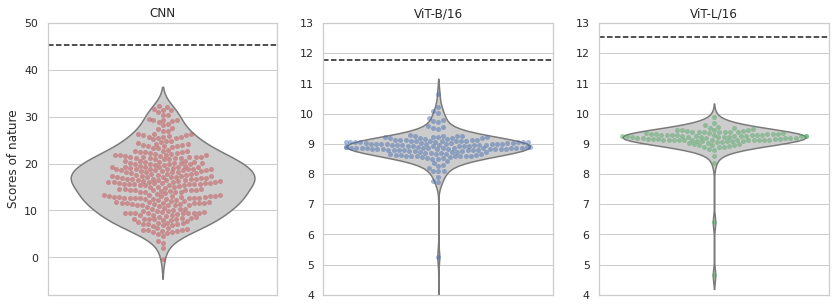

In [55]:
# plot scores as a swarm plot on top of a violin plot for each model
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.set(style="whitegrid")
sns.violinplot(y="nature_scores", data=df.iloc[:300], inner=None, color=".8")
sns.swarmplot(y="nature_scores", data=df.iloc[:300], color="r", alpha=.5)
# Plot a horizontal line
plt.axhline(syn_mean, color='k', linestyle='--')
plt.title('CNN')
plt.ylim(-8, 50)
plt.ylabel('Scores of nature')
plt.subplot(1, 3, 2)
sns.violinplot(y="nature_scores", data=df_2.iloc[:150], inner=None, color=".8")
sns.swarmplot(y="nature_scores", data=df_2.iloc[:150], color="b", alpha=.5)
plt.axhline(syn_2_mean, color='k', linestyle='--')
plt.ylim(4, 13)
plt.title('ViT-B/16')
plt.ylabel('')
plt.subplot(1, 3, 3)
sns.violinplot(y="nature_scores", data=df_3.iloc[:100], inner=None, color=".8")
sns.swarmplot(y="nature_scores", data=df_3.iloc[:100], color="g", alpha=.5)
plt.axhline(syn_3_mean, color='k', linestyle='--')
plt.ylim(4, 13)
plt.title('ViT-L/16')
plt.ylabel('')
plt.savefig('./results/useful_plots/nature_scores.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
# Read the evolution of the scores
evo_cnn = pd.read_csv('./results/scores/evolution/alexnet_exp.csv', index_col=0)
evo_vit_b = pd.read_csv('./results/scores/evolution/vit_b_16_exp.csv', index_col=0)
evo_vit_l = pd.read_csv('./results/scores/evolution/vit_l_16_exp.csv', index_col=0)

In [59]:
# Scale the scores to be between 0 and 1
evo_cnn['avg_scores'] = (evo_cnn['avg_scores'] - evo_cnn['avg_scores'].min()) / (evo_cnn['avg_scores'].max() - evo_cnn['avg_scores'].min())
evo_vit_b['avg_scores'] = (evo_vit_b['avg_scores'] - evo_vit_b['avg_scores'].min()) / (evo_vit_b['avg_scores'].max() - evo_vit_b['avg_scores'].min())
evo_vit_l['avg_scores'] = (evo_vit_l['avg_scores'] - evo_vit_l['avg_scores'].min()) / (evo_vit_l['avg_scores'].max() - evo_vit_l['avg_scores'].min())

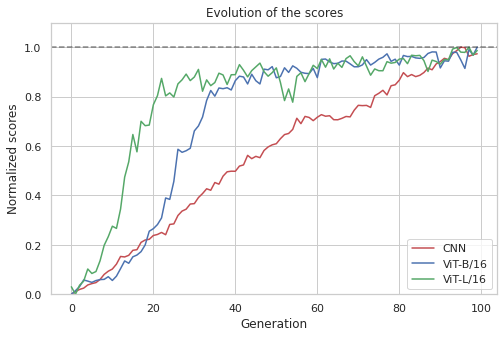

In [74]:
# plot the evolution of the scores on a same plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=evo_cnn.avg_scores, color='r', label='CNN')
sns.lineplot(data=evo_vit_b.avg_scores, color='b', label='ViT-B/16')
sns.lineplot(data=evo_vit_l.avg_scores, color='g', label='ViT-L/16')
plt.axhline(1, color='k', linestyle='--', alpha=0.5)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.ylabel('Normalized scores')
plt.xlabel('Generation')
plt.title('Evolution of the scores')
plt.savefig('./results/useful_plots/evolution_scores.png', dpi=300, bbox_inches='tight')
plt.show()